In [ ]:
#This algorithm was inspired by A.Gautam et al. The pseudocode is on their published paper. 
#This code is entirely my own but is still unfinished however.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
import biosppy
import os



# EMPIRICAL ITERATIVE ALGORITHM (A Data Driven Empirical Iterative Algorithm for GSR Signal Pre-Processing)

In [2]:
#set working directory
os.chdir("D:\Engineering\PROJECTMARS\GSR_Data")

"""Setting Up Parameters"""
df = pd.read_csv('01_A_GSR.csv')

Time = df[' TimeStamp (Shimmer)']
XShimmer = df['X (Shimmer)']
YShimmer = df['Y (Shimmer)']
ZShimmer = df['Z (Shimmer)']
SkinConductance = df['Skin Conductance']
SkinResistance = df['Skin Resistance']
PPG = df['PPG']
HRV = df['HRV']
HeartRate = df['Heart Rate']
GyroP = df['Gyro P (Shimmer)']
GyroR = df['Gyro R (Shimmer)']
GyroY = df['Gyro Y (Shimmer)']

In [3]:
#finding max and min
maxi_index, maxi = find_peaks(SkinConductance, height=0)
SCinv = SkinConductance * -1
mini_index, mini = find_peaks(SCinv, height=-9999999)

#convert max and min data into lists
list1=[]
list2=[]
list2a=[]
for i in maxi.values():
    for x in i:
        list1.append(x)

for i in mini.values():
    for x in i:
        list2.append(x)

for i in list2:
    i = i*-1
    list2a.append(i)
    
#convert max and min into arrays
maxi_data = list(maxi.values())
maxi = np.array(maxi_data)
maxi =maxi.transpose()

mini_data = list(mini.values())
mini = np.array(mini_data)
mini =mini.transpose()


In [4]:
midpoint_index = []
midpoint_value = []

if mini_index[0] < maxi_index[0]:
    for i in range(len(maxi_index)-1):
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i]])/2)
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i+1]])/2)
        midpoint_value.append((list2a[i]+list1[i])/2)
        midpoint_value.append((list2a[i]+list1[i+1])/2)
else:
    for i in range(len(maxi_index)-1):
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i]])/2)
        midpoint_index.append((Time[mini_index[i+1]]+Time[maxi_index[i]])/2)
        midpoint_value.append((list2a[i]+list1[i])/2)
        midpoint_value.append((list2a[i+1]+list1[i])/2)


In [5]:
cs = scipy.interpolate.CubicSpline(midpoint_index,midpoint_value)

print(cs(Time))
print(type(cs(Time)))

[1922.50677236 1922.50577348 1922.49570578 ... 1997.77700917 1997.60884079
 1996.13587591]
<class 'numpy.ndarray'>


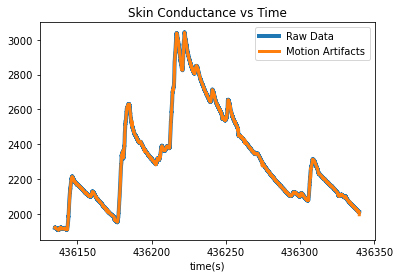

In [6]:
fig, ax1 = plt.subplots()
ax1.set_title('Skin Conductance')
ax1.plot(Time,SkinConductance, label='Raw Data',linewidth = 4)
ax1.plot(Time,cs(Time), label='Motion Artifacts',linewidth = 3)
ax1.legend(loc='upper right')
ax1.set(xlabel='time(s)', title='Skin Conductance vs Time')
plt.show()



In [7]:
list_temp=[]
list_temp=cs(Time).tolist()
SC_cont = pd.DataFrame({'SC' : list_temp[:]})
sc = SC_cont['SC']
maxi_index, maxi = find_peaks(sc.values, height=0)
cs_inv = sc.values * -1
mini_index, mini = find_peaks(cs_inv, height=-9999999)

print(len(maxi_index))
print(len(mini_index))
list1=[]
list2=[]
list2a=[]

for i in maxi.values():
    for x in i:
        list1.append(x)

for i in mini.values():
    for x in i:
        list2.append(x)

for i in list2:
    i = i*-1
    list2a.append(i)
#converting values into arrays
maxi_data = list(maxi.values())
maxi = np.array(maxi_data)
maxi =maxi.transpose()

mini_data = list(mini.values())
mini = np.array(mini_data)
mini =mini.transpose()

midpoint_index = []
midpoint_value = []

if mini_index[0] < maxi_index[0]:
    for i in range(len(mini_index)-1):
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i]])/2)
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i+1]])/2)
        midpoint_value.append((list2a[i]+list1[i])/2)
        midpoint_value.append((list2a[i]+list1[i+1])/2)
else:
    for i in range(len(maxi_index)-1):
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i]])/2)
        midpoint_index.append((Time[mini_index[i+1]]+Time[maxi_index[i]])/2)
        midpoint_value.append((list2a[i]+list1[i])/2)
        midpoint_value.append((list2a[i+1]+list1[i])/2)

cs = scipy.interpolate.CubicSpline(midpoint_index,midpoint_value)

2608
2608


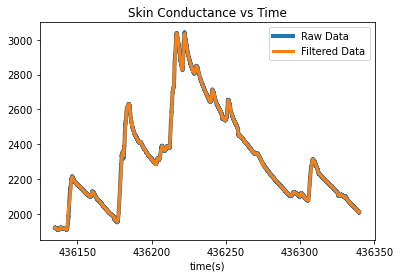

In [8]:
fig, ax1 = plt.subplots()
ax1.set_title('Skin Conductance')
ax1.plot(Time,SkinConductance, label='Raw Data',linewidth = 4)
ax1.plot(Time,cs(Time), label='Filtered Data',linewidth = 3)
ax1.legend(loc='upper right')
ax1.set(xlabel='time(s)', title='Skin Conductance vs Time')
plt.show()



In [9]:
maxi_index, maxi = find_peaks(sc.values, height=0)
cs_inv = sc.values * -1
mini_index, mini = find_peaks(cs_inv, height=-9999999)

list1=[]
list2=[]
list2a=[]

for i in maxi.values():
    for x in i:
        list1.append(x)

for i in mini.values():
    for x in i:
        list2.append(x)

for i in list2:
    i = i*-1
    list2a.append(i)
#converting values into arrays
maxi_data = list(maxi.values())
maxi = np.array(maxi_data)
maxi =maxi.transpose()

mini_data = list(mini.values())
mini = np.array(mini_data)
mini =mini.transpose()

midpoint_index = []
midpoint_value = []

if mini_index[0] < maxi_index[0]:
    for i in range(len(maxi)-1):
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i]])/2)
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i+1]])/2)
        midpoint_value.append((mini[i]+maxi[i])/2)
        midpoint_value.append((mini[i]+maxi[i+1])/2)
else:
    for i in range(len(maxi)-1):
        midpoint_index.append((Time[mini_index[i]]+Time[maxi_index[i]])/2)
        midpoint_index.append((Time[mini_index[i+1]]+Time[maxi_index[i]])/2)
        midpoint_value.append((mini[i]+maxi[i])/2)
        midpoint_value.append((mini[i+1]+maxi[i])/2)
cs = scipy.interpolate.CubicSpline(midpoint_index,midpoint_value)

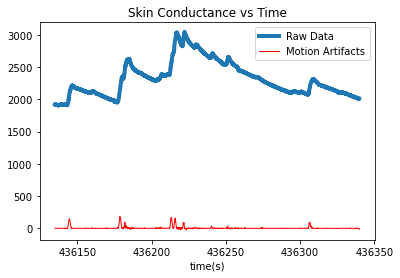

In [10]:
fig, ax1 = plt.subplots()
ax1.set_title('Skin Conductance')
ax1.plot(Time,SkinConductance, label='Raw Data',linewidth = 4)
ax1.plot(Time,cs(Time), label='Motion Artifacts',linewidth = 1,color='r')
ax1.legend(loc='upper right')
ax1.set(xlabel='time(s)', title='Skin Conductance vs Time')
plt.show()
